# Figure 9 - CW LIFUS neuromodulatory effects on STN neuron at low acoustic intensities

Compute the temporal firing rate profiles of an STN neuron over a narrow range of low acoustic intensities, from SONIC model predictions.

### Imports

In [1]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
from PySONIC.utils import logger, Intensity2Pressure
from PySONIC.plt import CompTimeSeries, GroupedTimeSeries
from PySONIC.core import NeuronalBilayerSonophore, PulsedProtocol, AcousticDrive
from PySONIC.neurons import getPointNeuron
from PySONIC.plt import cm2inch
from utils import saveFigsAsPDF, subdirectory

logger.setLevel(logging.INFO)

### Data sub-directory

In [2]:
subdir = subdirectory('STN')

### Plot parameters

In [3]:
figindex = 9
FR_figsize = cm2inch(20, 8)
trace_figsize = cm2inch(14, 6)
fs = 12
figs = {}

### Simulation parameters

In [9]:
a = 32e-9       # m
Fdrive = 500e3  # Hz
pp = PulsedProtocol(1.0, 1.0, 100., 1.0)
cov = 1.0
pneuron = getPointNeuron('STN')
nbls = NeuronalBilayerSonophore(a, pneuron)

## Panel A: firing rate profiles as a function of acoustic amplitude

In [5]:
intensities = np.hstack((
        np.arange(10, 101, 10),
        np.arange(101, 131, 1),
        np.array([140])))  # W/m2
amps = Intensity2Pressure(intensities)  # Pa
outputs = [nbls.getOutput(AcousticDrive(Fdrive, A), pp, cov, 'sonic', None, outputdir=subdir) for A in amps]

 29/04/2020 12:30:16: File "ASTIM_STN_CW_32nm_f_500kHz_A_5.71kPa_tstim_1s_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\STN" -> preserving
 29/04/2020 12:30:16: Loading data from "ASTIM_STN_CW_32nm_f_500kHz_A_5.71kPa_tstim_1s_sonic.pkl"
 29/04/2020 12:30:16: File "ASTIM_STN_CW_32nm_f_500kHz_A_8.07kPa_tstim_1s_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\STN" -> preserving
 29/04/2020 12:30:16: Loading data from "ASTIM_STN_CW_32nm_f_500kHz_A_8.07kPa_tstim_1s_sonic.pkl"
 29/04/2020 12:30:16: File "ASTIM_STN_CW_32nm_f_500kHz_A_9.89kPa_tstim_1s_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\STN" -> preserving
 29/04/2020 12:30:16: Loading data from "ASTIM_STN_CW_32nm_f_500kHz_A_9.89kPa_tstim_1s_sonic.pkl"
 29/04/2020 12:30:16: File "ASTIM_STN_CW_32nm_f_500kHz_A_11.41kPa_tstim_1s_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\STN" -> pres

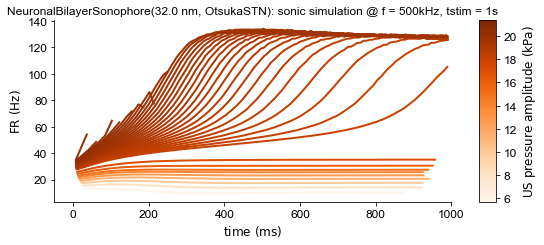

In [6]:
fig = CompTimeSeries(outputs, 'FR').render(
    patches='none', cmap='Oranges', trange=(0, 1.0), figsize=FR_figsize, fs=fs)
figs['a'] = fig

## Panel B: charge density profiles for characteristic acoustic amplitudes

 29/04/2020 12:30:17: File "ASTIM_STN_CW_32nm_f_500kHz_A_18.05kPa_tstim_1s_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\STN" -> preserving
 29/04/2020 12:30:17: Loading data from "ASTIM_STN_CW_32nm_f_500kHz_A_18.05kPa_tstim_1s_sonic.pkl"
 29/04/2020 12:30:18: File "ASTIM_STN_CW_32nm_f_500kHz_A_19.27kPa_tstim_1s_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\STN" -> preserving
 29/04/2020 12:30:18: Loading data from "ASTIM_STN_CW_32nm_f_500kHz_A_19.27kPa_tstim_1s_sonic.pkl"
 29/04/2020 12:30:18: File "ASTIM_STN_CW_32nm_f_500kHz_A_20.02kPa_tstim_1s_sonic.pkl" already present in directory "C:\Users\lemaire\Documents\SONIC paper data\STN" -> preserving
 29/04/2020 12:30:18: Loading data from "ASTIM_STN_CW_32nm_f_500kHz_A_20.02kPa_tstim_1s_sonic.pkl"


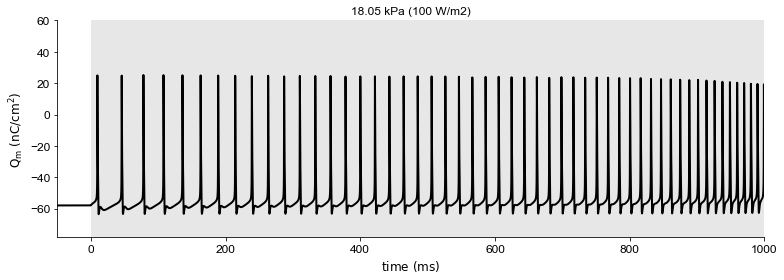

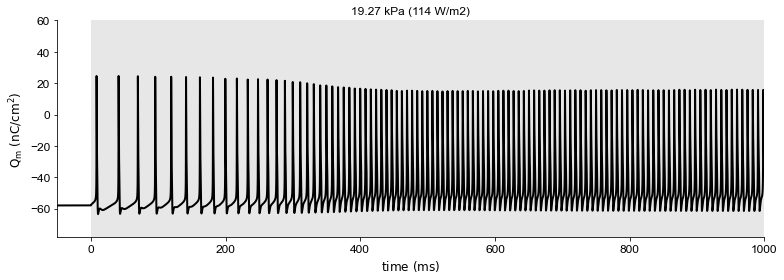

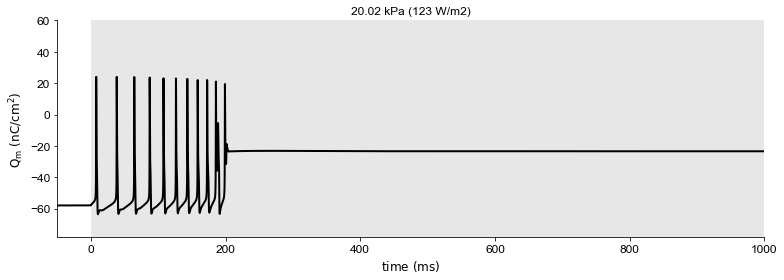

In [7]:
intensities = np.array([100, 114, 123])  # W/m2
amps = Intensity2Pressure(intensities)  # Pa
outputs = [nbls.getOutput(AcousticDrive(Fdrive, A), pp, cov, 'sonic', None, outputdir=subdir) for A in amps]
figtraces = GroupedTimeSeries(outputs, pltscheme={'Q_m': ['Qm']}).render(fs=fs)
for (I, A), fig in zip(zip(intensities, amps), figtraces):
    fig.axes[0].set_title(f'{A * 1e-3:.2f} kPa ({I:.0f} W/m2)')
    figs[f'b_Qtrace_{I:.0f}_W_per_m2'] = fig

### Save figure panels

Save figure panels as **pdf** in the *figs* sub-folder:

In [8]:
saveFigsAsPDF(figs, figindex)